# Stationarity of a Time Series

## Daily Female Births Dataset and Airline Passengers Dataset

In this notebook, we learn how to check Stationarity of a Time Series with the Daily Female Births and Airline Passengers datasets. 

The Daily Female Births dataset describes the number of daily female births in California in 1959. The units are a count and there are 365 observations. The source of the dataset is credited to Newton (1988). The Airline Passengers dataset describes the total number of airline passengers over time. The units are a count of the number of airline passengers in thousands. There are 144 monthly observations from 1949 to 1960. 

Download the datasets and place them in your current working directory with the names daily-total-female-births.csv and airline-passengers.csv.

In [20]:
%matplotlib inline
import sys
!{sys.executable[:-6]}/pip install statsmodels

In [1]:
data_fbirths_path = './data/daily-total-female-births.csv'
data_airline_path = './data/airline-passengers.csv'

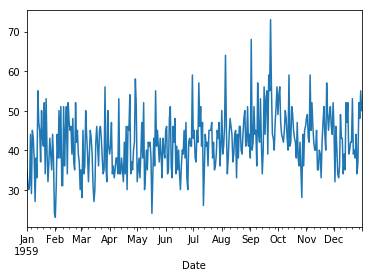

In [3]:
# load time series data
from pandas import read_csv
from matplotlib import pyplot

series = read_csv(data_fbirths_path, header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()

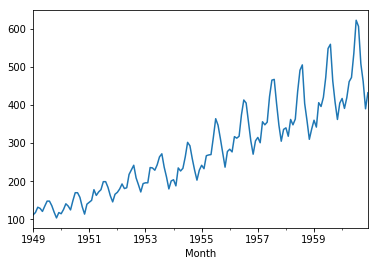

In [5]:
# load time series data
from pandas import read_csv
from matplotlib import pyplot

series = read_csv(data_airline_path, header=0, index_col=0, parse_dates=True,squeeze=True)
series.plot()

## Summary Statistics to Check Stationarity of a Time Series

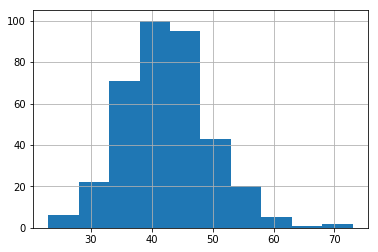

In [8]:
# plot a histogram of a time series
from pandas import read_csv
from matplotlib import pyplot

series = read_csv(data_fbirths_path, header=0, index_col=0, parse_dates=True, squeeze=True)
series.hist()
pyplot.show()

In [9]:
# calculate statistics of partitioned time series data
from pandas import read_csv

series = read_csv(data_fbirths_path, header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


## Augmented Dickey-Fuller test

Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected (or fail to be rejected). The result must be interpreted for a given problem to be meaningful. Nevertheless, they can provide a quick check to see whether your time series is stationary or non-stationary.
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

In [21]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

series = read_csv(data_fbirths_path, header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


We can perform the same test on the Airline Passenger dataset.

In [22]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

series = read_csv(data_airline_path, header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


## Differencing to Remove Seasonality

In [23]:
from math import sin
from math import radians
from matplotlib import pyplot

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob

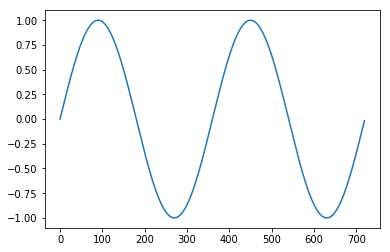

In [24]:
# define a dataset with a linear trend
data = [sin(radians(i)) for i in range(360)] + [sin(radians(i)) for i in range(360)]
pyplot.plot(data)
pyplot.show()

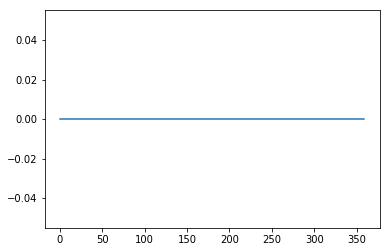

In [25]:
# difference the dataset
diff = difference(data, 360)
pyplot.plot(diff)
pyplot.show()

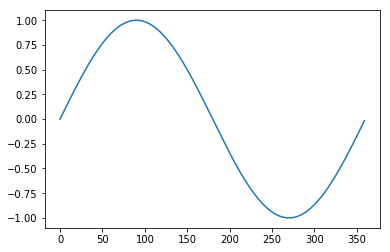

In [26]:
# invert the difference
inverted = [inverse_difference(data[i], diff[i]) for i in range(len(diff))]
pyplot.plot(inverted)
pyplot.show()

#### Female Births

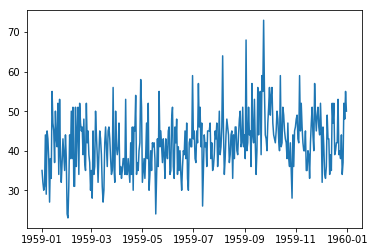

In [27]:
fbirths = read_csv(data_fbirths_path, header=0, index_col=0, parse_dates=True, squeeze=True)
pyplot.plot(fbirths)
pyplot.show()

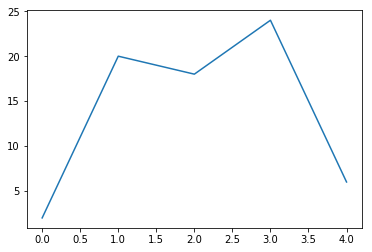

In [28]:
# difference the dataset
fbirths_diff = difference(fbirths, 360)
pyplot.plot(fbirths_diff)
pyplot.show()

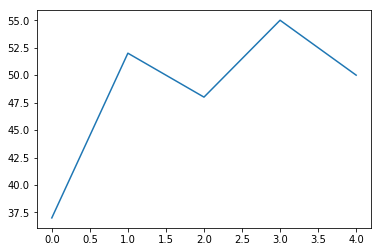

In [29]:
# invert the difference
fbirths_inverted = [inverse_difference(fbirths[i], fbirths_diff[i]) for i in range(len(fbirths_diff))]
pyplot.plot(fbirths_inverted)
pyplot.show()

#### Airline passengers

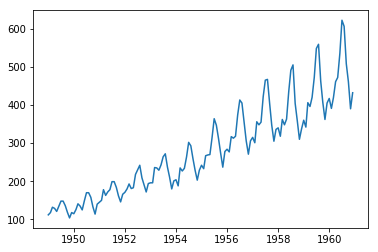

In [30]:
airline = read_csv(data_airline_path, header=0, index_col=0, parse_dates=True, squeeze=True)
pyplot.plot(airline)
pyplot.show()